# Support Vector Machine Model

In [12]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [13]:
data = np.load("./data/data_pca_50_y_mean.pickle.npz")
data.files

['arr_0', 'arr_1', 'arr_2']

In [14]:
X = data["arr_0"]
y = data["arr_1"]
mean = data["arr_2"]

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4370, 50), (1093, 50), (4370,), (1093,))

Trains machine learning model.

In [16]:
from sklearn.svm import SVC

model = SVC(C=1.0, kernel="rbf", gamma= 0.01, probability= True)
model.fit(x_train, y_train)
print("Model trained successfully!")

Model trained successfully!


Scores.

In [17]:
model.score(x_train, y_train), model.score(x_test, y_test)

(0.8617848970251716, 0.8051235132662397)

## Model evaluation
- Confusion Matrix
- Classification Report
- Kappa Score
- ROC and AUC (probability)

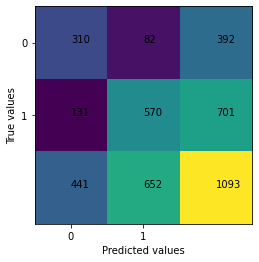

In [30]:
from sklearn import metrics

y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test) # Probabilities

cm = metrics.confusion_matrix(y_test, y_pred)
cm = np.concatenate((cm, cm.sum(axis=0).reshape(1, -1)), axis=0)
cm = np.concatenate((cm, cm.sum(axis=1).reshape(-1, 1)), axis=1)

plt.imshow(cm)

for i in range(3):
    for j in range(3):
        plt.text(i, j, cm[i,j])

plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.show()


Makes classification report.

In [33]:
class_report = metrics.classification_report(y_test, y_pred, target_names=["male", "female"], output_dict= True)
pd.DataFrame(class_report).T

,precision,recall,f1-score,support
male,0.790816,0.702948,0.744298,441.000000
female,0.813124,0.874233,0.842572,652.000000
accuracy,0.805124,0.805124,0.805124,0.805124
macro avg,0.801970,0.788590,0.793435,1093.000000
weighted avg,0.804123,0.805124,0.802921,1093.000000


Kappa score.

In [34]:
metrics.cohen_kappa_score(y_test, y_pred)

0.5877480189472752

## ROC and AUC

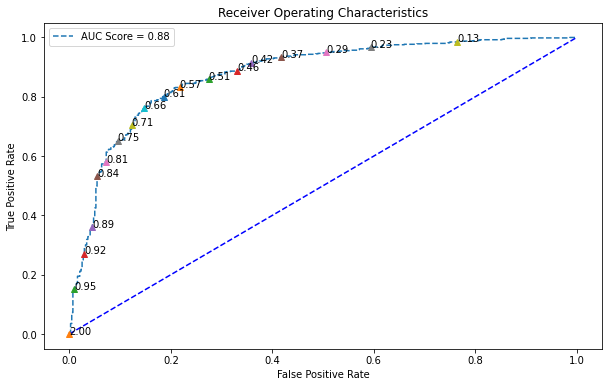

In [39]:
fpr, tpr, thresh = metrics.roc_curve(y_test, y_prob[:, 1]) # ROC for female
auc_score = metrics.auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, "--")
plt.plot([0, 1], [0, 1], "b--")

for i in range(0, len(thresh), 20):
    plt.plot(fpr[i], tpr[i], "^")
    plt.text(fpr[i], tpr[i], "%0.2f"%thresh[i])

plt.legend(["AUC Score = %0.2f"%auc_score])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.show()